In [176]:
import util

from matplotlib import pyplot

import collections, itertools, pathlib, string


In [177]:
allowed_targets = util.parse_word_list(pathlib.Path('./allowed_targets.txt'))
allowed_targets = [word.upper() for word in allowed_targets]
allowed_targets.sort()

TARGET_LENGTH = len(allowed_targets[0])

len(allowed_targets), TARGET_LENGTH


(2309, 5)

In [178]:
words_with_letter = collections.Counter(
    itertools.chain(*map(set, allowed_targets)))

sorted_letter_frequencies = words_with_letter.most_common()

sorted_letter_frequencies


[('E', 1053),
 ('A', 906),
 ('R', 835),
 ('O', 672),
 ('T', 667),
 ('I', 646),
 ('L', 645),
 ('S', 617),
 ('N', 548),
 ('U', 456),
 ('C', 446),
 ('Y', 416),
 ('H', 377),
 ('D', 370),
 ('P', 345),
 ('G', 299),
 ('M', 298),
 ('B', 266),
 ('F', 206),
 ('K', 202),
 ('W', 193),
 ('V', 148),
 ('X', 37),
 ('Z', 35),
 ('Q', 29),
 ('J', 27)]

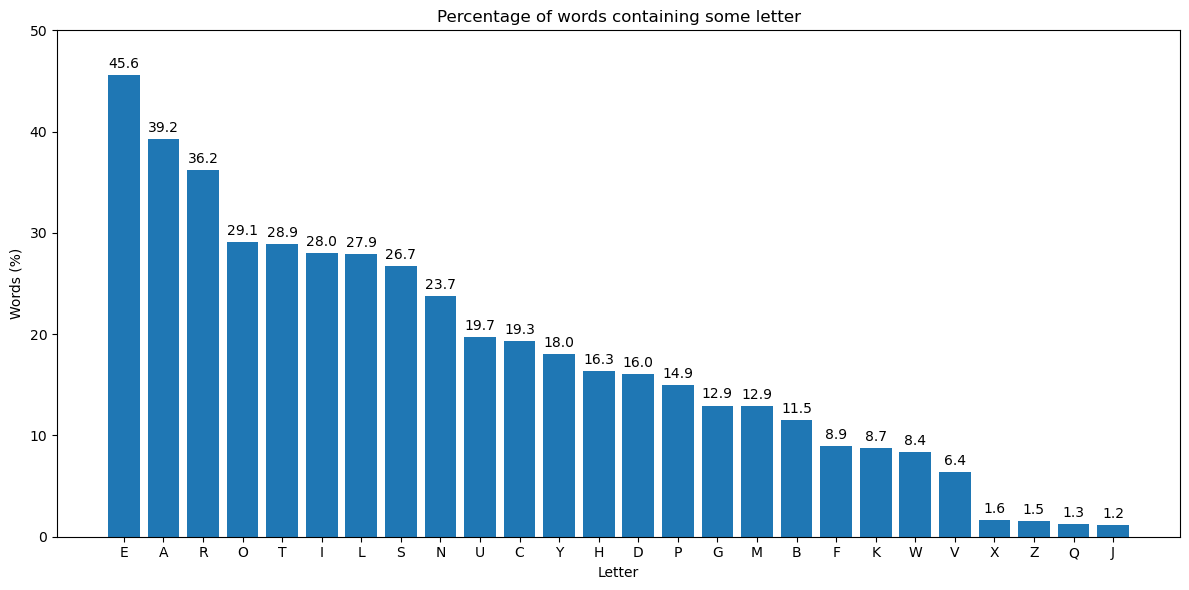

In [179]:
pyplot.figure(figsize=(12, 6))
x = [letter for letter, words in sorted_letter_frequencies]
y = [
    words / len(allowed_targets) * 100
    for letter, words in sorted_letter_frequencies
]
bars = pyplot.bar(x, y)
for i, bar in enumerate(bars):
    pyplot.annotate(
        f'{y[i]:.1f}',  # Format the number with two decimal places
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom')
pyplot.xlabel('Letter')
pyplot.ylabel('Words (%)')
pyplot.title('Percentage of words containing some letter')
pyplot.tight_layout()
pyplot.ylim(0, 50)
pyplot.show()

In [180]:
indexed_frequencies = {
    letter: [
        sum(w[i] == letter for w in allowed_targets)
        for i in range(TARGET_LENGTH)
    ]
    for letter in sorted(words_with_letter.keys())
}

indexed_frequencies


{'A': [140, 304, 306, 162, 63],
 'B': [173, 16, 56, 24, 11],
 'C': [198, 40, 56, 150, 31],
 'D': [111, 20, 75, 69, 118],
 'E': [72, 241, 177, 318, 422],
 'F': [135, 8, 25, 35, 26],
 'G': [115, 11, 67, 76, 41],
 'H': [69, 144, 9, 28, 137],
 'I': [34, 201, 266, 158, 11],
 'J': [20, 2, 3, 2, 0],
 'K': [20, 10, 12, 55, 113],
 'L': [87, 200, 112, 162, 155],
 'M': [107, 38, 61, 68, 42],
 'N': [37, 87, 137, 182, 130],
 'O': [41, 279, 243, 132, 58],
 'P': [141, 61, 57, 50, 56],
 'Q': [23, 5, 1, 0, 0],
 'R': [105, 267, 163, 150, 212],
 'S': [365, 16, 80, 171, 36],
 'T': [149, 77, 111, 139, 253],
 'U': [33, 185, 165, 82, 1],
 'V': [43, 15, 49, 45, 0],
 'W': [82, 44, 26, 25, 17],
 'X': [0, 14, 12, 3, 8],
 'Y': [6, 22, 29, 3, 364],
 'Z': [3, 2, 11, 20, 4]}

Percent of words having some letter at some position


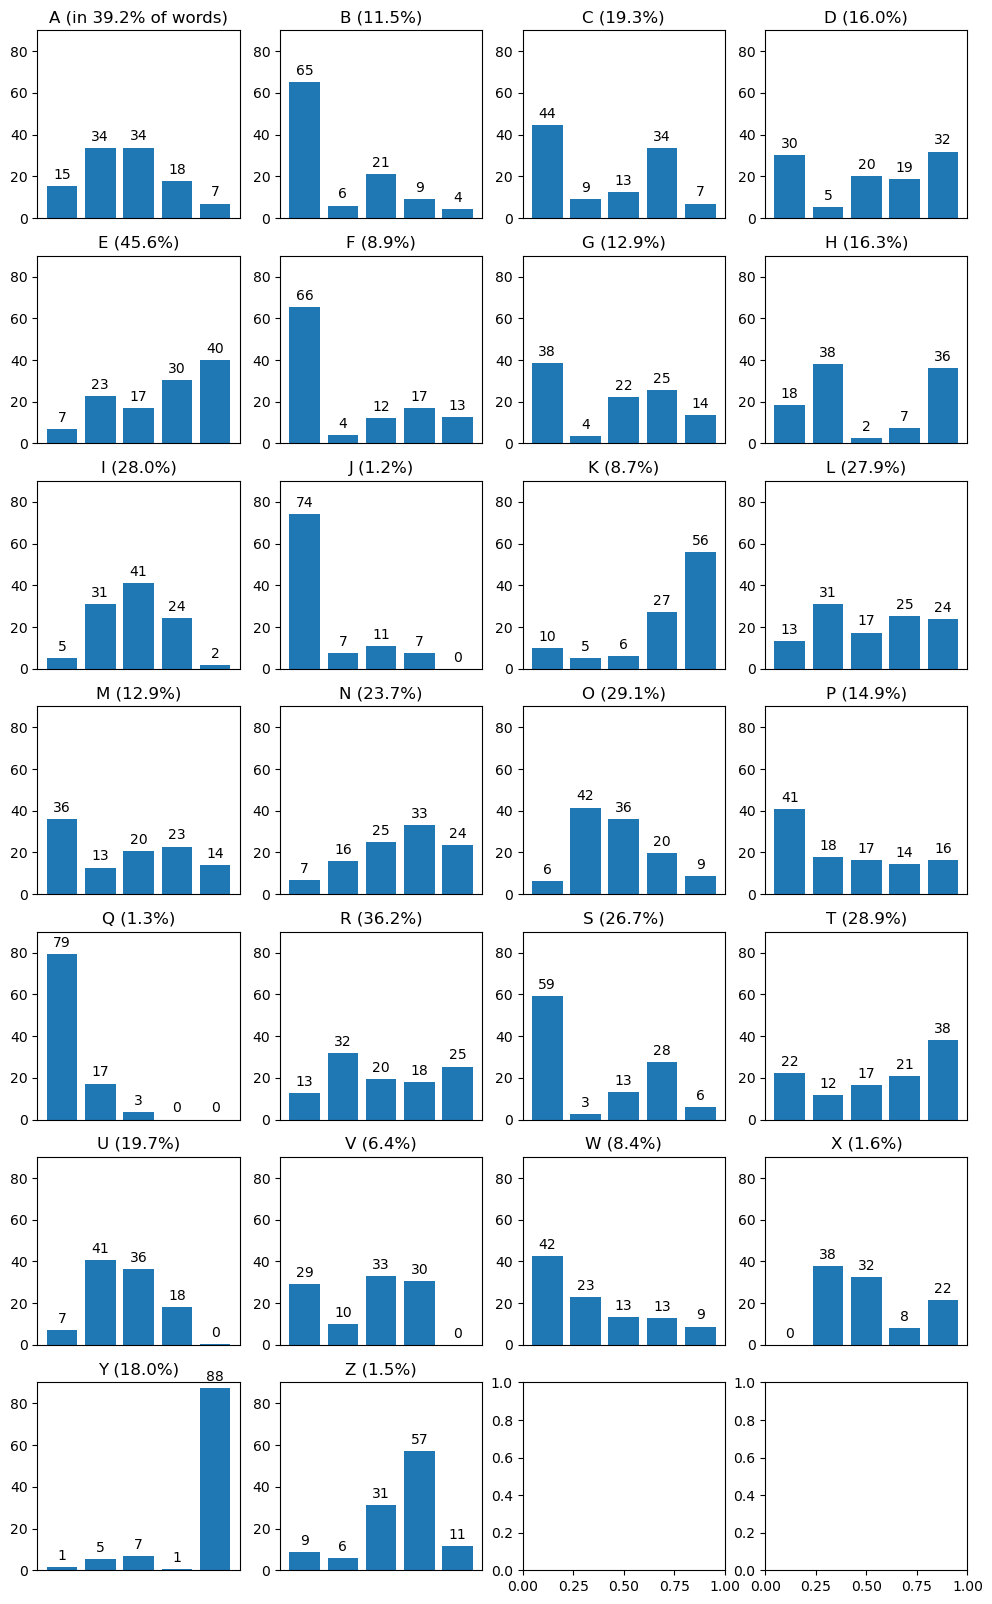

In [181]:
figure, axes = pyplot.subplots(7, 4, figsize=(12, 20))
axes = axes.flatten()
print('Percent of words having some letter at some position')
for i, (letter, frequencies) in enumerate(indexed_frequencies.items()):
    ax = axes[i]
    x = list(range(1, 1 + TARGET_LENGTH))
    y = [f / words_with_letter[letter] * 100 for f in frequencies]
    bars = ax.bar(x, y)
    for j, bar in enumerate(bars):
        ax.annotate(
            f'{y[j]:.0f}',  # Format the number with two decimal places
            xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center',
            va='bottom')
    if i == 0:
        ax.set_title(
            f'{letter} (in {words_with_letter[letter] / len(allowed_targets):.1%} of words)'
        )
    else:
        ax.set_title(
            f'{letter} ({words_with_letter[letter] / len(allowed_targets):.1%})'
        )
    ax.set_xticks([])
    ax.set_ylim(0, 90)


In [182]:
letters_at_index = [
    collections.Counter({
        letter: indexed_frequencies[letter][i]
        for letter in words_with_letter
    }).most_common() for i in range(TARGET_LENGTH)
]

for i, c in enumerate(letters_at_index):
    print(i + 1, c)


1 [('S', 365), ('C', 198), ('B', 173), ('T', 149), ('P', 141), ('A', 140), ('F', 135), ('G', 115), ('D', 111), ('M', 107), ('R', 105), ('L', 87), ('W', 82), ('E', 72), ('H', 69), ('V', 43), ('O', 41), ('N', 37), ('I', 34), ('U', 33), ('Q', 23), ('K', 20), ('J', 20), ('Y', 6), ('Z', 3), ('X', 0)]
2 [('A', 304), ('O', 279), ('R', 267), ('E', 241), ('I', 201), ('L', 200), ('U', 185), ('H', 144), ('N', 87), ('T', 77), ('P', 61), ('W', 44), ('C', 40), ('M', 38), ('Y', 22), ('D', 20), ('B', 16), ('S', 16), ('V', 15), ('X', 14), ('G', 11), ('K', 10), ('F', 8), ('Q', 5), ('Z', 2), ('J', 2)]
3 [('A', 306), ('I', 266), ('O', 243), ('E', 177), ('U', 165), ('R', 163), ('N', 137), ('L', 112), ('T', 111), ('S', 80), ('D', 75), ('G', 67), ('M', 61), ('P', 57), ('B', 56), ('C', 56), ('V', 49), ('Y', 29), ('W', 26), ('F', 25), ('K', 12), ('X', 12), ('Z', 11), ('H', 9), ('J', 3), ('Q', 1)]
4 [('E', 318), ('N', 182), ('S', 171), ('A', 162), ('L', 162), ('I', 158), ('C', 150), ('R', 150), ('T', 139), ('O'

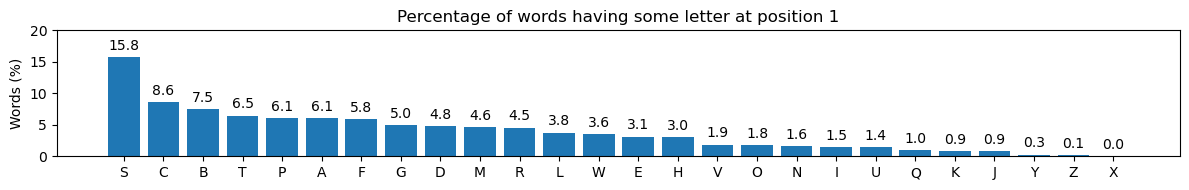

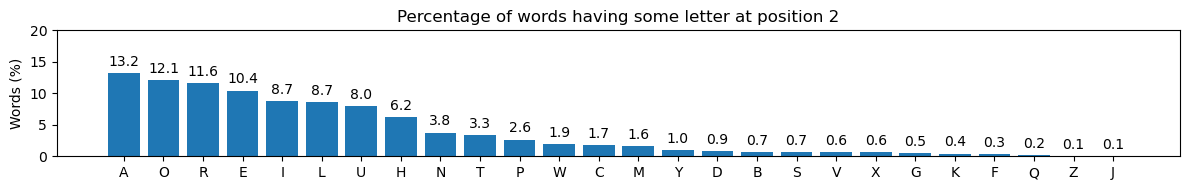

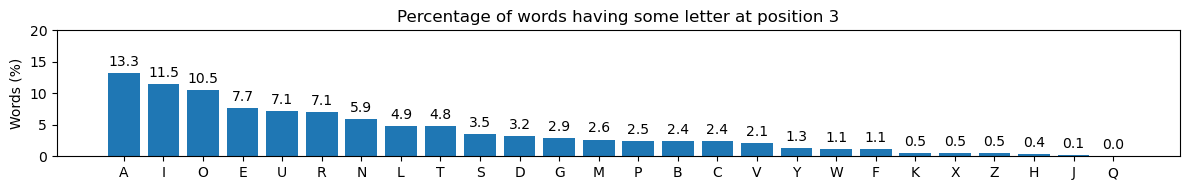

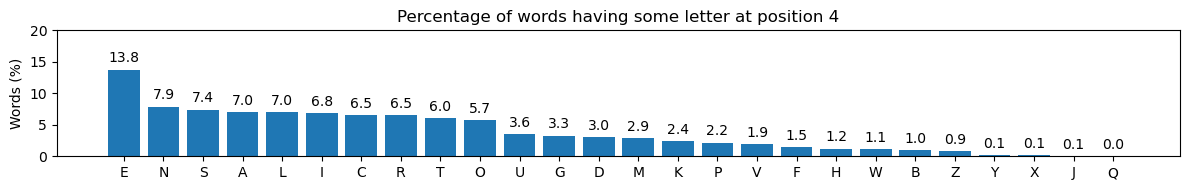

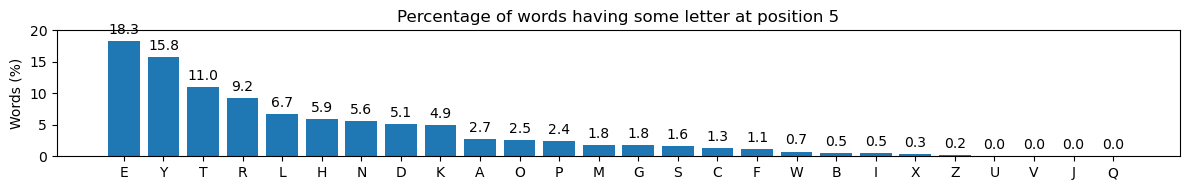

In [183]:
for i, c in enumerate(letters_at_index):
    pyplot.figure(figsize=(12, 2))
    x = [letter for letter, words in c]
    y = [words / len(allowed_targets) * 100 for letter, words in c]
    bars = pyplot.bar(x, y)
    for j, bar in enumerate(bars):
        pyplot.annotate(
            f'{y[j]:.1f}',  # Format the number with two decimal places
            xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center',
            va='bottom')
    pyplot.ylabel('Words (%)')
    pyplot.title(f'Percentage of words having some letter at position {i + 1}')
    pyplot.tight_layout()
    pyplot.ylim(0, 20)
    pyplot.show()


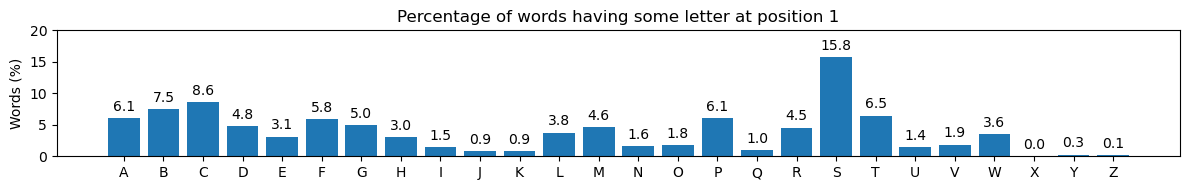

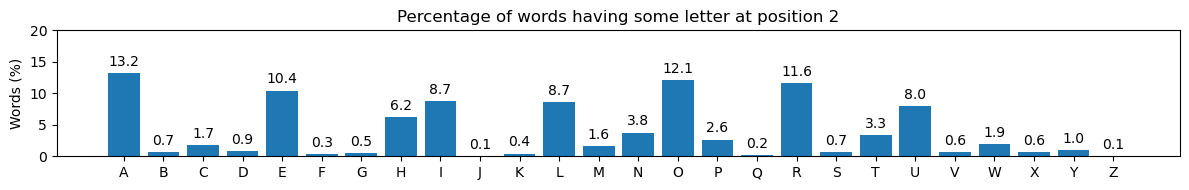

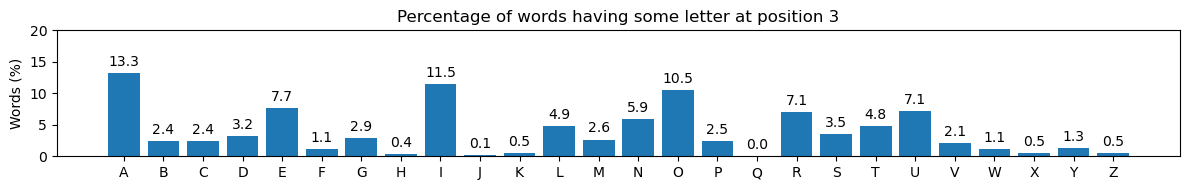

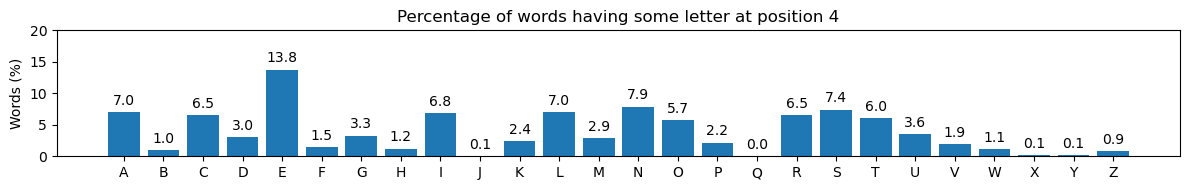

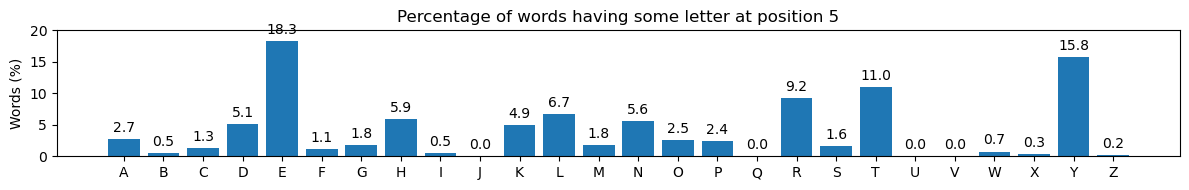

In [184]:
for i, c in enumerate(letters_at_index):
    pyplot.figure(figsize=(12, 2))
    x = [letter for letter, words in sorted(c)]
    y = [words / len(allowed_targets) * 100 for letter, words in sorted(c)]
    bars = pyplot.bar(x, y)
    for j, bar in enumerate(bars):
        pyplot.annotate(
            f'{y[j]:.1f}',  # Format the number with two decimal places
            xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center',
            va='bottom')
    pyplot.ylabel('Words (%)')
    pyplot.title(f'Percentage of words having some letter at position {i + 1}')
    pyplot.tight_layout()
    pyplot.ylim(0, 20)
    pyplot.show()
